In [4]:
import pandas as pd # For data manipulation and cleaning 
import numpy as np # For numerical operations
import matplotlib.pyplot as plt # For visualization
import seaborn as sns # For visualization
from sklearn.model_selection import train_test_split # For machine learning models
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

Explore The Dataset (EDA)

In [ ]:
df = pd.read_csv('D:\HumanCognitivePerformance\human_cognitive_performance.csv')
df.head()

,User_ID,Age,Gender,Sleep_Duration,Stress_Level,Diet_Type,Daily_Screen_Time,Exercise_Frequency,Caffeine_Intake,Reaction_Time,Memory_Test_Score,Cognitive_Score,AI_Predicted_Score
0,U1,57,Female,6.5,3,Non-Vegetarian,6.5,Medium,41,583.33,65,36.71,39.77
1,U2,39,Female,7.6,9,Non-Vegetarian,10.8,High,214,368.24,58,54.35,57.68
2,U3,26,Male,8.2,6,Vegetarian,5.7,Low,429,445.21,49,32.57,29.54
3,U4,32,Male,7.8,9,Vegetarian,8.3,Low,464,286.33,94,70.15,74.59
4,U5,50,Male,9.7,2,Non-Vegetarian,11.3,Medium,365,237.65,62,87.54,91.78


In [15]:
# Dimensions of the data
print(f'The data contains {df.shape[0]} records and {df.shape[1]} columns.')

# Datatypes of the data
print(f'\nThe data contains the following data types: \n{df.dtypes.value_counts()}')

The data contains 80000 records and 13 columns.

The data contains the following data types: 
float64    5
object     4
int64      4
Name: count, dtype: int64


In [7]:
df.info()      # column types + missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   User_ID             80000 non-null  object 
 1   Age                 80000 non-null  int64  
 2   Gender              80000 non-null  object 
 3   Sleep_Duration      80000 non-null  float64
 4   Stress_Level        80000 non-null  int64  
 5   Diet_Type           80000 non-null  object 
 6   Daily_Screen_Time   80000 non-null  float64
 7   Exercise_Frequency  80000 non-null  object 
 8   Caffeine_Intake     80000 non-null  int64  
 9   Reaction_Time       80000 non-null  float64
 10  Memory_Test_Score   80000 non-null  int64  
 11  Cognitive_Score     80000 non-null  float64
 12  AI_Predicted_Score  80000 non-null  float64
dtypes: float64(5), int64(4), object(4)
memory usage: 7.9+ MB


In [8]:
df.describe() # basic stats

,Age,Sleep_Duration,Stress_Level,Daily_Screen_Time,Caffeine_Intake,Reaction_Time,Memory_Test_Score,Cognitive_Score,AI_Predicted_Score
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,38.525525,7.005332,5.493762,6.504646,248.988213,399.973579,69.498350,58.172395,58.121357
std,12.101876,1.734435,2.865308,3.167072,144.541990,115.369329,17.305659,23.058522,23.119598
min,18.000000,4.000000,1.000000,1.000000,0.000000,200.000000,40.000000,0.000000,0.000000
25%,28.000000,5.500000,3.000000,3.800000,123.000000,300.150000,55.000000,40.910000,40.850000
50%,39.000000,7.000000,5.000000,6.500000,249.000000,400.360000,70.000000,58.360000,58.360000
75%,49.000000,8.500000,8.000000,9.200000,375.000000,499.250000,85.000000,75.830000,75.890000
max,59.000000,10.000000,10.000000,12.000000,499.000000,599.990000,99.000000,100.000000,100.000000


In [9]:
df.isna().any().any()

False

In [12]:
df.isnull().sum()


User_ID               0
Age                   0
Gender                0
Sleep_Duration        0
Stress_Level          0
Diet_Type             0
Daily_Screen_Time     0
Exercise_Frequency    0
Caffeine_Intake       0
Reaction_Time         0
Memory_Test_Score     0
Cognitive_Score       0
AI_Predicted_Score    0
dtype: int64

In [13]:
df.duplicated().any().sum()

0

Unnecessary values for model predictions, such as User_ID and AI_Predicted_Score, can be removed.

In [16]:
df_copy = df.copy()
df_copy.drop(['User_ID', 'AI_Predicted_Score'], axis=1, inplace=True)
df_copy.head()

,Age,Gender,Sleep_Duration,Stress_Level,Diet_Type,Daily_Screen_Time,Exercise_Frequency,Caffeine_Intake,Reaction_Time,Memory_Test_Score,Cognitive_Score
0,57,Female,6.5,3,Non-Vegetarian,6.5,Medium,41,583.33,65,36.71
1,39,Female,7.6,9,Non-Vegetarian,10.8,High,214,368.24,58,54.35
2,26,Male,8.2,6,Vegetarian,5.7,Low,429,445.21,49,32.57
3,32,Male,7.8,9,Vegetarian,8.3,Low,464,286.33,94,70.15
4,50,Male,9.7,2,Non-Vegetarian,11.3,Medium,365,237.65,62,87.54


In [17]:
for col in df_copy:
    print(f'Column: {col}')
    print(df_copy[col].value_counts(), "\n")

Column: Age
Age
40    1979
50    1972
32    1963
29    1961
49    1959
44    1956
37    1955
43    1944
18    1941
33    1938
28    1928
19    1925
54    1924
58    1921
34    1921
55    1920
47    1920
48    1918
35    1915
56    1915
27    1914
22    1909
39    1909
51    1902
25    1901
30    1893
46    1888
53    1887
57    1887
31    1878
38    1877
24    1875
42    1872
59    1868
41    1859
21    1858
36    1853
20    1848
52    1848
26    1847
23    1829
45    1823
Name: count, dtype: int64 

Column: Gender
Gender
Female    38404
Male      38322
Other      3274
Name: count, dtype: int64 

Column: Sleep_Duration
Sleep_Duration
9.9     1410
4.4     1408
6.8     1407
7.9     1407
5.4     1394
        ... 
4.8     1263
4.9     1259
5.6     1246
4.0      678
10.0     669
Name: count, Length: 61, dtype: int64 

Column: Stress_Level
Stress_Level
3     8103
8     8092
5     8070
7     8027
6     8020
4     8019
10    7969
1     7969
2     7931
9     7800
Name: count, dtype: int64 

Col

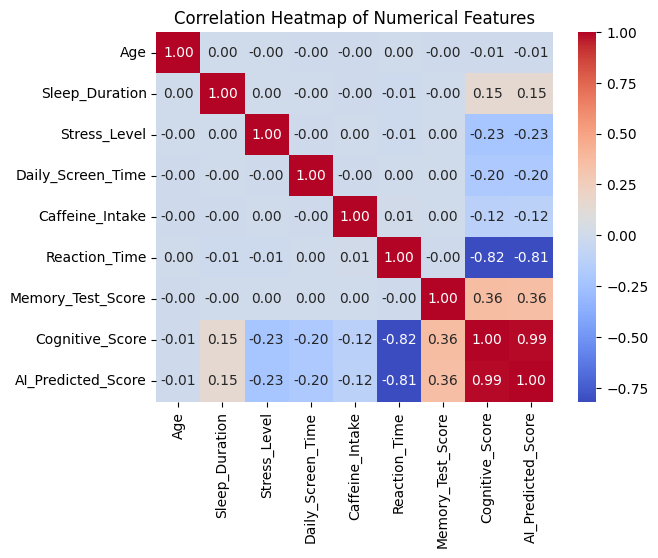

In [11]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Plot heatmap of correlations
sns.heatmap(numerical_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


Values of type object cannot be processed by the machine learning model and should therefore be encoded

In [18]:
df_copy['Gender'] = df_copy['Gender'].map({
    'Male': 0,
    'Female': 1,
    'Other': 2
})

df_copy['Diet_Type'] = df_copy['Diet_Type'].map({
    'Vegetarian': 0,
    'Non-Vegetarian': 1,
    'Vegan': 2
})

df_copy['Exercise_Frequency'] = df_copy['Exercise_Frequency'].map({
    'Low': 0,
    'Medium': 1,
    'High': 2
})
